# PROBLEMA DE CLASSIFICAÇÃO

Base:

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

# INICIALIZAÇÃO

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carrega base e visualiza primeiras linhas
df1 =pd.read_csv('mobile.csv')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Verificando se a base está balanceada
df1.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
# Dimensões da base
df1.shape

(2000, 21)

# Indicando a semente inicial para divisão da base em treino e teste

In [ ]:
# Semente inicial
np.random.seed(0)

In [ ]:
# Separando a base
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'price_range'], #Input(todas as linhas e todas colunas <> "price_range")
                                                     df1['price_range'],# Output "price_range"
                                                     test_size=0.3, # 30% para base de teste
                                                     stratify=df1.price_range) # extratificando para manter a proporção dos dados

In [ ]:
# Balanceamento do teste
y_test.value_counts()

2    150
0    150
1    150
3    150
Name: price_range, dtype: int64

In [ ]:
# Balanceamento do treino
y_train.value_counts()

3    350
1    350
0    350
2    350
Name: price_range, dtype: int64

In [ ]:
# Verificando as dimensões do conjunto de treinamento
x_train.shape

(1400, 20)

In [ ]:
# Visualizando alguns dados estatísticos por atributo
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1400.0,1239.501429,437.142296,501.0,854.75,1226.0,1614.25,1998.0
blue,1400.0,0.490714,0.500092,0.0,0.00,0.0,1.00,1.0
clock_speed,1400.0,1.501571,0.808964,0.5,0.70,1.5,2.20,3.0
dual_sim,1400.0,0.517857,0.499860,0.0,0.00,1.0,1.00,1.0
fc,1400.0,4.294286,4.375410,0.0,1.00,3.0,7.00,19.0
four_g,1400.0,0.509286,0.500092,0.0,0.00,1.0,1.00,1.0
int_memory,1400.0,32.123571,18.008370,2.0,16.00,32.0,47.00,64.0
m_dep,1400.0,0.500786,0.286919,0.1,0.20,0.5,0.70,1.0
mobile_wt,1400.0,139.869286,35.534931,80.0,109.00,140.5,170.00,200.0
n_cores,1400.0,4.540714,2.305427,1.0,3.00,4.0,7.00,8.0


# Analise exploratória

## Dispersão

### Visualização RAM x INT_MEMORY(Internal Memory in Gigabytes) e cores como as classes de sáída(PRICE_RANGE)

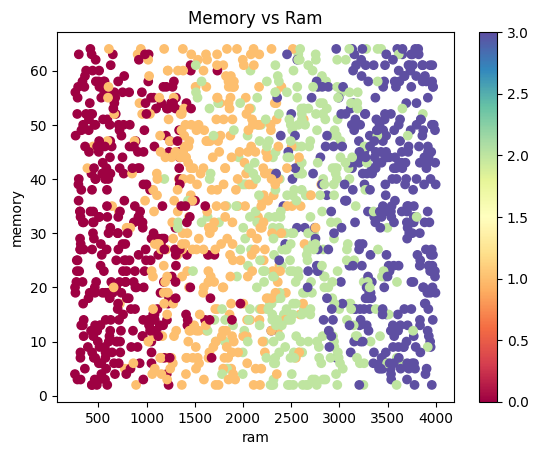

In [ ]:
# Análises de algumas medidas resumo da base usando o gráfico de dispersão
plt.scatter(x_train['ram'], x_train['int_memory'], c=y_train, cmap=plt.cm.Spectral);
plt.colorbar();
plt.xlabel('ram');
plt.ylabel('memory');
plt.title('Memory vs Ram');

Com a visualização é possível identificar que a **ram** influencia no preço do celular ao contrário da **memory**

# Visualização PRICE_RANGE x BATTERY_POWER e cores como as classes de saída(PRICE_RANGE)

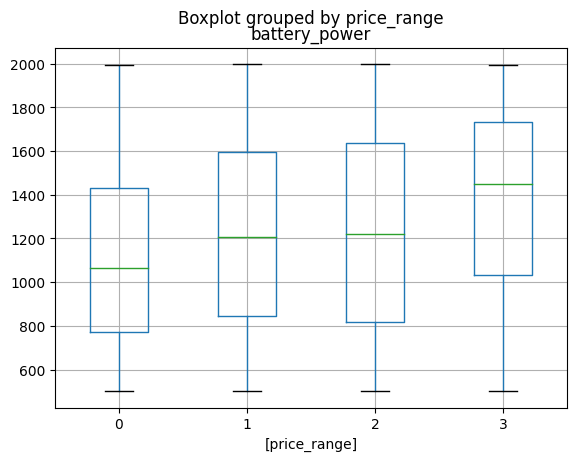

In [ ]:
#Gerando um boxplot battery_powe vs price_range
df1.boxplot(column=['battery_power'], by=['price_range']);

O minimo e o maximo são iguias nas faixas de preço mas a mediana está aumentando.

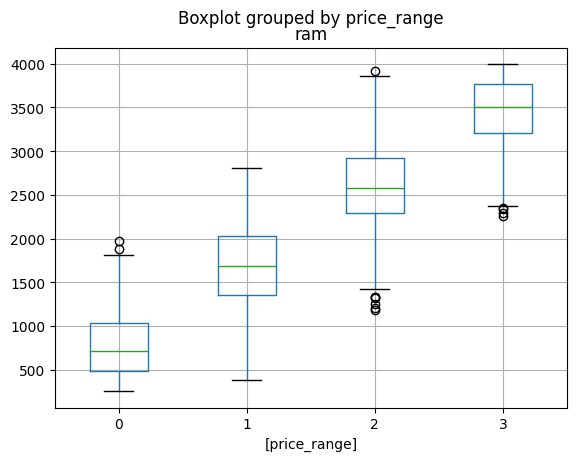

In [ ]:
#Gerando um boxplot ram vs price_range
df1.boxplot(column=['ram'], by=['price_range']);

É possível identificar um aumento de preço com o aumento da ram.

Os valores maiores da ram são outliers.

Na faixa de preço mais cara os outliers são para ram mais baixa.

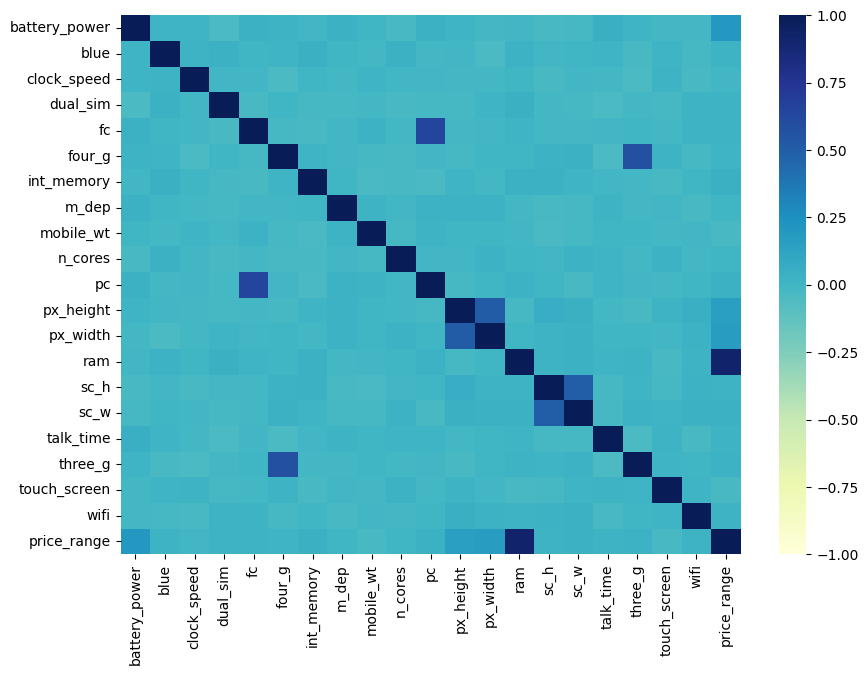

In [ ]:
# Análise de correlação
import seaborn as sns
plt.figure(figsize=(10,7))
corr = df1.corr()
sns.heatmap(corr, vmin=-1, vmax=1, yticklabels=True, cmap='YlGnBu',);
plt.savefig('corr.jpg')


- Correlação forte entre "pc" e "fc"

- Correlação forte entre "three_g" e "four_g"

- Correlação forte entre "price_range" e "ram"


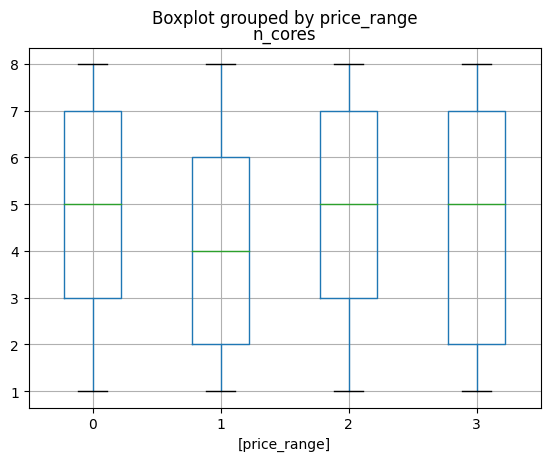

In [ ]:
#Gerando um boxplot ram vs price_range
df1.boxplot(column = ['n_cores'], by=['price_range']);

O "n_cores" não inflência no "price_range"

# Normalizando os dados

In [ ]:
# Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X_train_normalized = scaler.transform(x_train)
X_test_normalized = scaler.transform(x_test)

In [ ]:
# Visualizando os da dados do treino normalizados
X_train_normalized[0:2]

array([[ 1.67625125, -0.98159786, -0.3729206 ,  0.96490128, -0.98180974,
        -1.01874713,  0.27088355,  0.69457067, -1.06607265, -1.10245158,
        -1.48789929,  0.14420986,  0.91488203,  0.68082246,  0.8527554 ,
        -1.34711469,  1.1199196 , -1.73205081, -1.01583972, -1.01149463],
       [-0.57324799,  1.01874713, -0.99121623, -1.03637545,  1.99040205,
         0.98159786,  1.04857765, -0.35139449, -0.22153125, -0.66853755,
         0.85751056,  0.04335261, -1.03199099,  0.20098875, -0.56204716,
        -1.1182082 ,  1.6692845 ,  0.57735027, -1.01583972,  0.98863599]])

In [ ]:
# Visualizando os da dados do test normalizados
X_test_normalized[0:2]

array([[ 0.97142341,  1.01874713,  1.72928456,  0.96490128,  1.07587534,
         0.98159786, -0.95120717, -0.00273943,  1.04528085,  1.06711858,
         1.52762766,  1.18191894,  1.5630708 , -0.14990692, -0.09044631,
         0.25523073, -0.34505348,  0.57735027, -1.01583972, -1.01149463],
       [-0.93023871,  1.01874713, -1.11487536,  0.96490128, -0.98180974,
         0.98159786, -0.28461223, -0.70004954,  0.14443669, -0.23462351,
        -1.32037001, -0.00371411,  0.0890757 , -1.42270957,  1.56015669,
         0.48413722,  1.48616287,  0.57735027, -1.01583972,  0.98863599]])

# Rede Neural

In [ ]:
from keras import Sequential # Criando uma rede vazia
from keras.layers import Dense # Uma camada densamente conectada
from tensorflow.keras.optimizers.legacy import SGD # Otimizador de gradiente
                                                   # descendente estocástico
                                                   # para fazer a minimização
                                                   # do erro da rede

In [ ]:
# Definindo o número de classes
NumberOfClasses = len(y_train.unique())
NumberOfClasses

4

In [ ]:
# Criando a rede neural
RN = Sequential()
RN.add(Dense(10, input_shape=X_train_normalized.shape[1:], activation='sigmoid')) # sigmoid
RN.add(Dense(NumberOfClasses, activation = 'sigmoid'))
RN.summary()# visualizando como ficou a rede neural

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                210       
                                                                 
 dense_21 (Dense)            (None, 4)                 44        
                                                                 
Total params: 254 (1016.00 Byte)
Trainable params: 254 (1016.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Treinamento
from tensorflow.keras.utils import to_categorical
sgd = SGD(learning_rate = 0.1, decay=1e-6, momentum=0.9) # Parâmetros do otimizador
RN.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs=100, validation_split=0.2) #treina o modelo

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 0.2132 - accuracy: 0.2071 - val_loss: 0.1906 - val_accuracy: 0.2393
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1883 - accuracy: 0.2732 - val_loss: 0.1856 - val_accuracy: 0.3071
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.3411 - val_loss: 0.1805 - val_accuracy: 0.4000
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.4295 - val_loss: 0.1741 - val_accuracy: 0.4821
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1706 - accuracy: 0.4982 - val_loss: 0.1653 - val_accuracy: 0.5107
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.5277 - val_loss: 0.1546 - val_accuracy: 0.5607
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1506 - accuracy: 0.5509 - val_loss: 0.1439 - val_accuracy: 0.5536
Epoch 8/100
3

In [ ]:
# Avaliando a rede neural
score = RN.evaluate(X_teste_normalized, to_categorical(y_test), verbose=0)
print('Test score', score[0])
print('Test accuracy:', score[1])

Test score 0.033780597150325775
Test accuracy: 0.9599999785423279


In [ ]:
# Dicionário com avaliação da loss e métrica por época
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

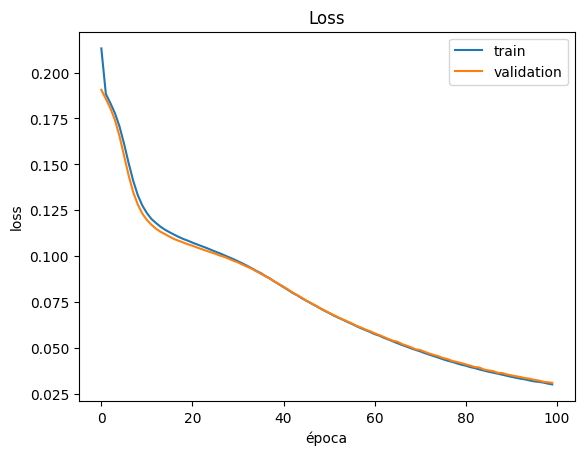

In [ ]:
# Gráfico do treinamento(loss): custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train') # treino
plt.plot(history.history['val_loss'], label='validation') # validação
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

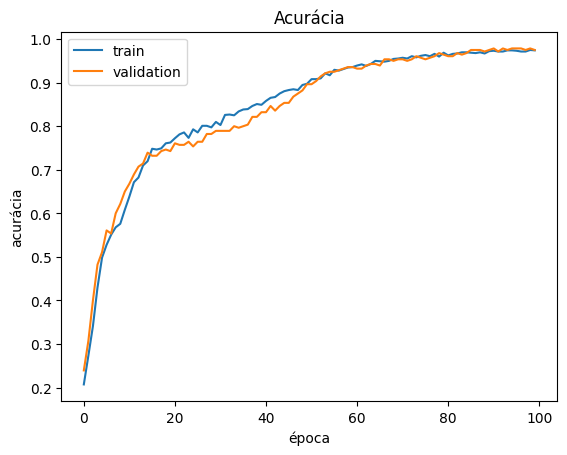

In [ ]:
# Gráfico do treinamento(acurácia): custo do treino e validação
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

In [ ]:
# Previsão
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted[0:2] # Imprime as duas primeiras predições(saídas dos 4 neurônios )

19/19 [==============================] - 0s 2ms/step


array([[2.8429832e-04, 3.6973231e-02, 7.9878354e-01, 7.1884871e-02],
       [9.4693303e-01, 1.2576279e-01, 5.2011339e-03, 1.4792690e-05]],
      dtype=float32)

In [ ]:
# Retorna o índice do neurônio que tem a maior saída
y_test_predicted_indexes = np.argmax(y_test_predicted, axis=1)
y_test_indexes = y_test.values
y_test_indexes[0:2] # Retorna os elementos do índice 0 até o índice 1

array([2, 0])

In [ ]:
# Matriz de confusão em um dataframe
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes)
pd.DataFrame(confMatrix, index=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3'],
             columns=['Real 0', 'Real 1', 'Real 2', 'Real 3'],)

,Real 0,Real 1,Real 2,Real 3
Pred 0,146,5,0,0
Pred 1,4,143,8,0
Pred 2,0,2,140,3
Pred 3,0,0,2,147


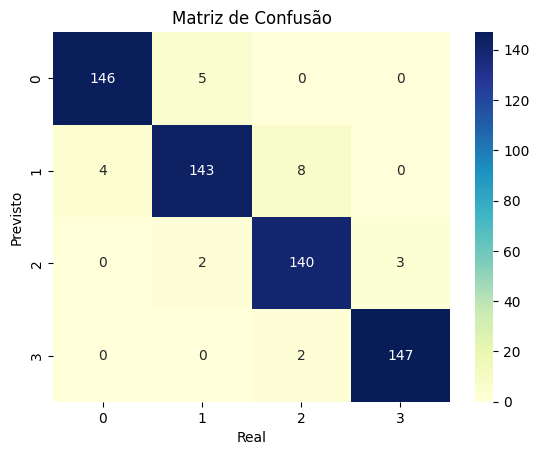

In [ ]:
# Matriz de confusao
import seaborn as sns
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['0', '1', '2', '3'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3'])
plt.show()

É possível identificar que:

- Classe 0 está se confundindo com a classe 1 (4 erros);
- Classe 1 está se confundindo com as classes 0 (5 erros) e com a 2 (2 erros);
- Classe 2 está se confundindo com as classes 1 (8 erros) e com a 3 (2 erros) e
- Classe 3 esta se confundindo com a classe 2 (3 erros).